# Heavy Drug Users in Curitiba, Brazil

This is part of the study conducted by [1] to estimate the population size of heavy drug users in Curitiba, Brazil. We aim here to visualize the RDS network. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import networkx as nx
import seaborn as sns
sns.set()

## Data

Here we present the data and explain each title as presented in the documentation. 

`treatment`: whether this respondent is in any CAPS treatment program 

`uid`: unique respondent identification number. 

`InCoupon`: Coupon number that the respondent arrived with.

`OutCoupon1`: First coupon the respondent was given.

`OutCoupon2`: Second coupon the respondent was given.

`OutCoupon3`: Third coupon the respondent was given.

`netsize.i.bss`: From $i=1,...,5$, it indicates personal network size as measured by question $i$. 

`female`: respondent’s gender (1=female, 0=male)

`color`: respondent’s self reported color (1=white, 2=black, 3=Asian, 4=brown, 5=indigenous)

`interview.date`: date interview took place (in MM/DD/YY format)

In [39]:
data = pd.read_csv("../data/nsum_curitiba_released/multiplier.csv", index_col = 0)
data.drop(columns=['program'+str(i) for i in range(1,6)], inplace = True)
data.head()

,treatment,IsSeed,parent.row,InCoupon,OutCoupon1,OutCoupon2,OutCoupon3,netsize.1.bss,netsize.2.bss,netsize.3.bss,netsize.4.bss,netsize.5.bss,uid,female,color,interview.date
1,0.0,True,NaN,1,11,12,13,70,70,70,15,15,1,0,4,7/28/09
2,0.0,True,NaN,2,21,22,23,20,20,20,10,8,3,0,4,7/28/09
3,0.0,True,NaN,3,31,32,33,300,300,300,5,5,4,0,1,7/29/09
4,0.0,True,NaN,4,41,42,43,40,40,40,25,5,5,0,1,7/29/09
5,0.0,False,1.0,11,111,112,113,10,10,10,2,1,6,0,5,8/3/09


In [40]:
data["interview.date"] = data["interview.date"].apply(lambda x: x.split('/'))
data["interview.date"] = data["interview.date"].apply(lambda x: "2009-{}-{}".format(x[0],x[1]))
data["interview.date"] = pd.to_datetime(data["interview.date"])

In [41]:
data["parent.row"] = data["parent.row"].fillna(0).astype(int)

How many seeds? 

In [42]:
data.IsSeed.sum()

5

In [48]:
nodes = [(s[0], {"network1": s[1][7],
                 "network2": s[1][8],
                 "network3": s[1][9],
                 "network4": s[1][10],
                 "network5": s[1][11],
                 "treatment": s[1][0],
                 "female": s[1][13],
                 "color": s[1][14],
                 "interview": s[1][14]
                 }) for s in data.iterrows()]

edges = [(s[1][2], s[0]) for s in data.iterrows() if s[1][2] != 0]

In [49]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

#### Coloring

In [83]:
g = 'color'
groups = set(nx.get_node_attributes(G,g).values())
color_map = dict(zip(groups, ["#a8f9ff","#9ae5e6","#81a094","#775b59","#32161f"]))

nodes = G.nodes()
colors = [color_map[G.nodes[n][g]] for n in nodes]

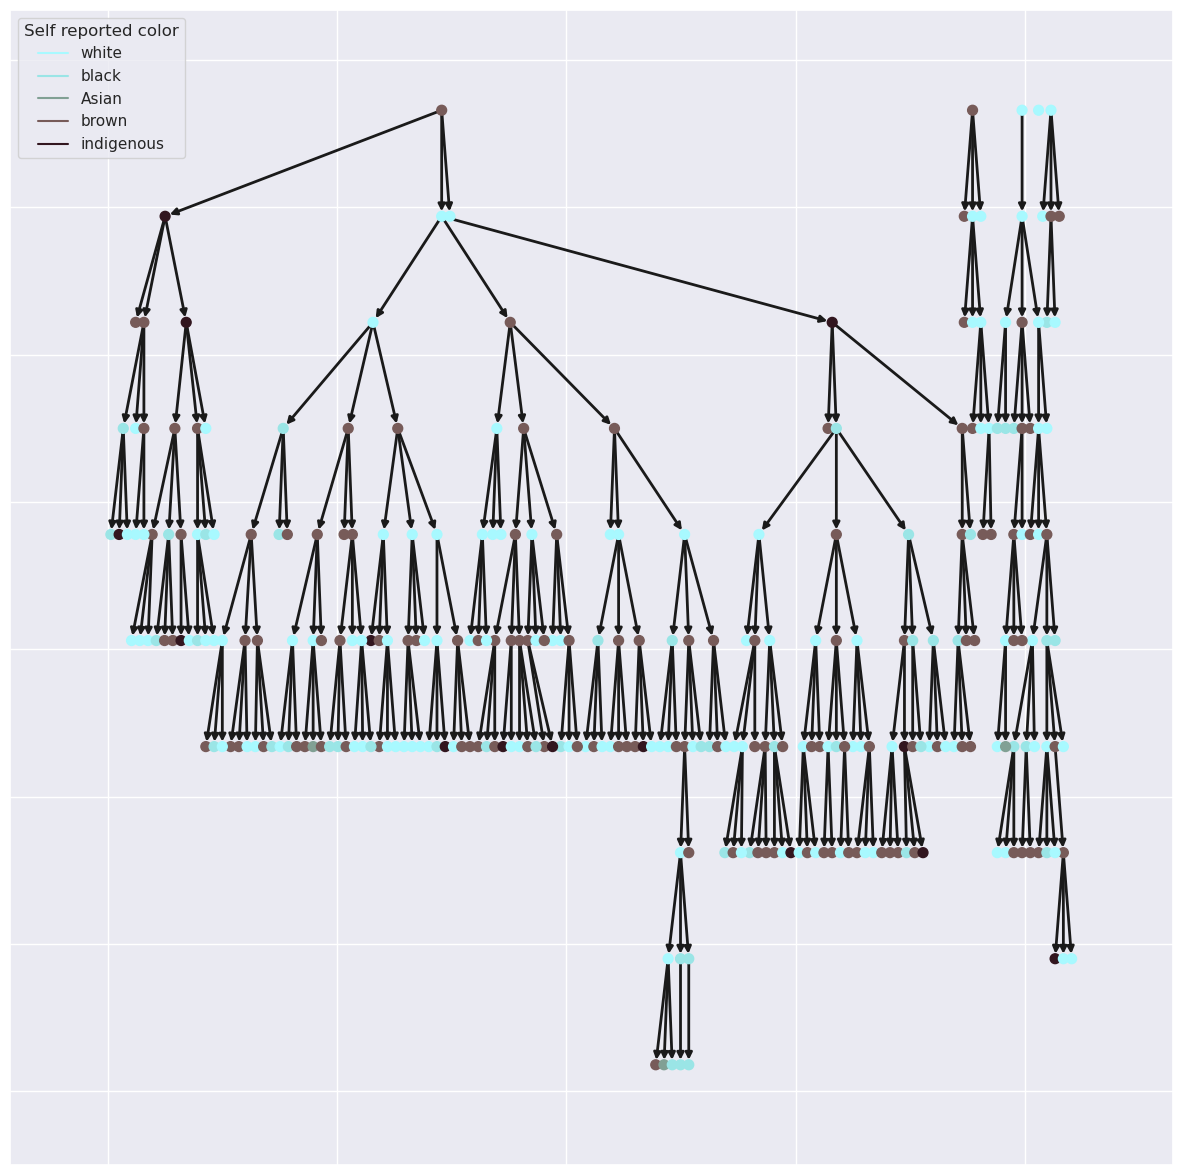

In [84]:
options = {
    'node_color': colors,
    'node_size': 50,
    'width': 2,
    'with_labels': False,
    'font_weight': 'bold'
}

plt.figure(figsize = (15,15))
pos = graphviz_layout(G, prog="dot")

for label in groups:
    plt.plot([0],[0],
             color=color_map[label],
             label={1: 'white', 2:'black', 3:'Asian', 4: 'brown', 5: 'indigenous'}[label])

nx.draw_networkx(G, pos, **options)

plt.legend(loc="upper left", title = "Self reported color")
plt.show()

Mean of recruited per recruiter. 

In [63]:
sum(dict(G.out_degree()).values())/len(dict(G.out_degree()).values())

0.9834983498349835

In [76]:
data['mean_netsize'] = data[['netsize.{}.bss'.format(i) for i in range(1,6)]].mean(axis=1)

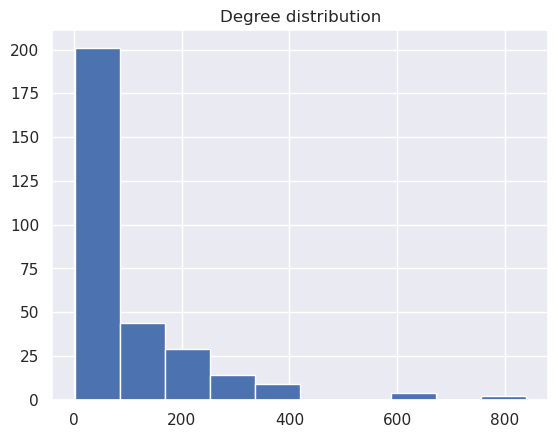

In [79]:
data.mean_netsize.hist(bins=10)
plt.title("Degree distribution")
plt.show()

## References 

[1] Salganik, M.J., Fazito, D., Bertoni, N., Abdo, A.H., Mello, M.B., and Bastos, F.I. (2011) "Assessing Network Scale-up Estimates for Groups Most at Risk of HIV/AIDS: Evidence From a Multiple-Method Study of Heavy Drug Users in Curitiba, Brazil." American Journal of Epidemiology, Vol. 174 No. 10, pp.1190-1196. Available for open access at http://dx.doi.org/10.1093/aje/kwr246.